# Predictive Maintenance for Industrial Equipment Project

Problem Description:
Our task is to develop a predictive maintenance system that can forecast potential failures in industrial equipment. 
The goal is to analyze historical equipment data to predict future maintenance needs, thereby preempting equipment failures.

# Steps Involved in this:


1.Importing necessary libraries.
2.Data Loading and Data Cleaning.
3.Data Visualization and Feature Engineering.
4.Model Selection and Model Building.
5.Training,Validation and Evaluation.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Data Loading
df=pd.read_csv("predictive_maintenance.csv")
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
# Checking the number of rows and columns in Dataset
print(df.shape)


(10000, 10)


In [4]:
#Check the Data types of Dataset
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [5]:
# Get info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
#Check Summary Statistics
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

# Data Preprocessing

We will clean and preprocess the data to make it suitable 
for analysis and modeling.This includes handling missing/null values,
encoding categorical variables and extract new features from existing ones.

In [8]:
# Checking the Missing values in our dataset
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

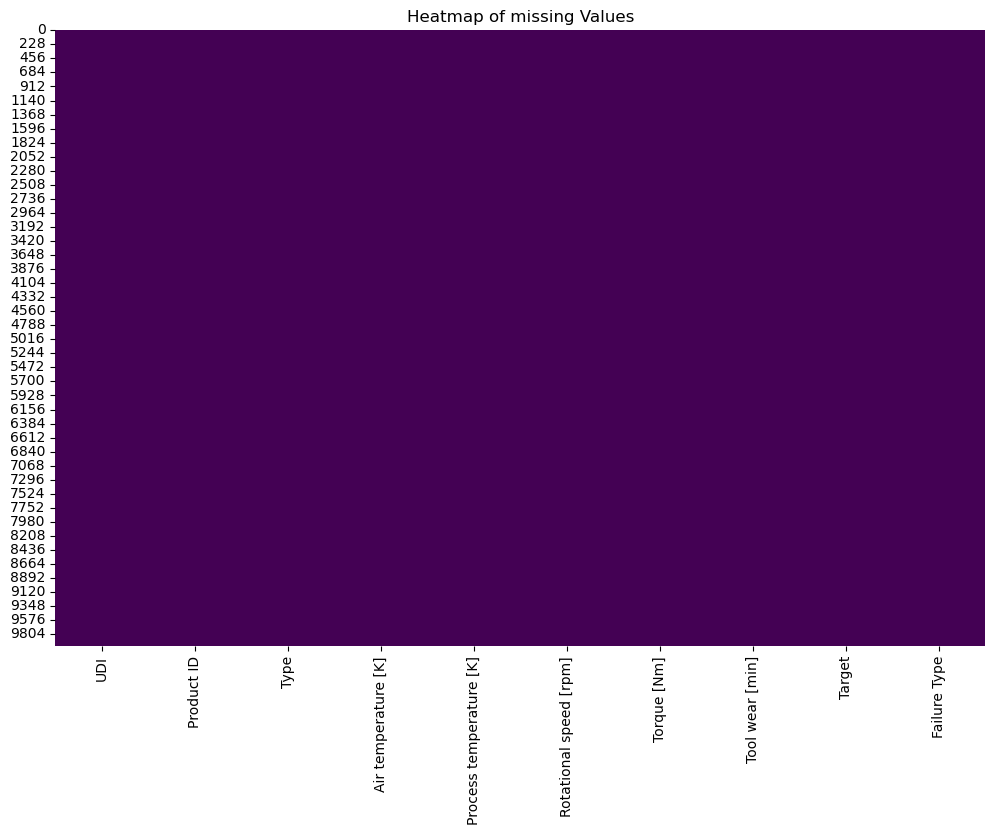

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Heatmap of missing Values')
plt.show()

<Axes: xlabel='Type'>

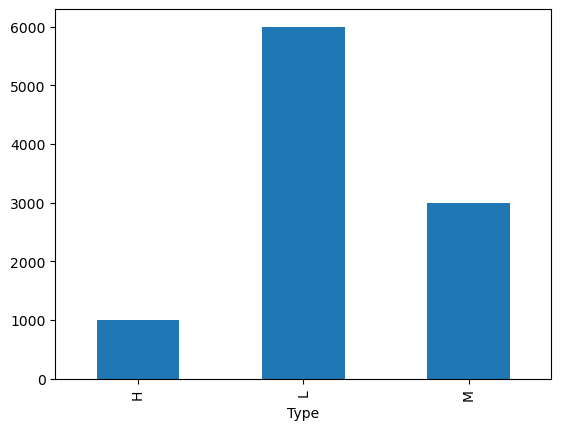

In [10]:
df.groupby("Type").count()["Product ID"].plot(kind="bar")

<Axes: xlabel='Failure Type'>

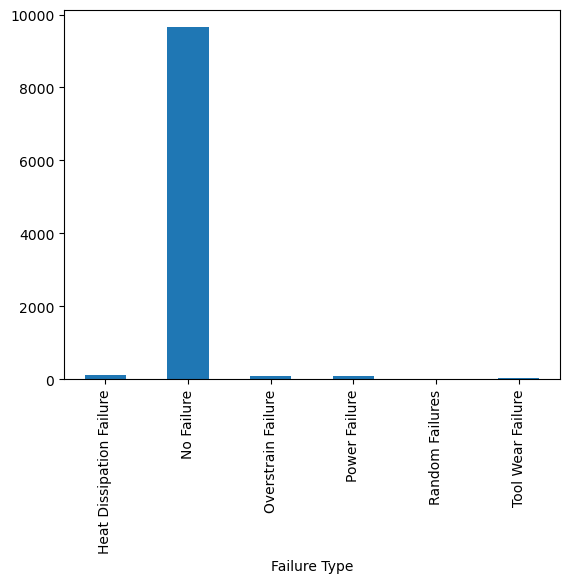

In [11]:
df.groupby("Failure Type").count()["Product ID"].plot(kind="bar")

#Some Understandings :
1.We need to transform/Rename some columns.
2. There are no missing values
3. `Type` Column has 3 types - L/M/H which is ordinal data , so apply ordinal encoding here.
    The target variable here is `Target` only, i.e. to predict failure or not
4. Notice that, there are two output target variables `Target` and `Failure Type`.
   So predict here multiclass Failure Type Variable
5. This is a classification problem.

In [12]:
#Rename Columns
df.rename(mapper={'Air temperature [K]': 'Air temperature',
                 'Process temperature [K]' : 'Process temperature',
                 'Rotational speed [rpm]' : 'Rotational speed',
                 'Torque [Nm]' : 'Torque',
                 'Tool wear [min]' : 'Tool wear'},axis=1,inplace=True)
df.head(5)

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [13]:
#Extracting Numeric features and categorical features
numeric_columns=[i for i in df.columns if df[i].dtype=="int64" or 
                 df[i].dtype=="float64"  ]
categorical_columns=[i for i in df.columns if df[i].dtype=="object"]
print(numeric_columns)
print(categorical_columns)

['UDI', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Target']
['Product ID', 'Type', 'Failure Type']


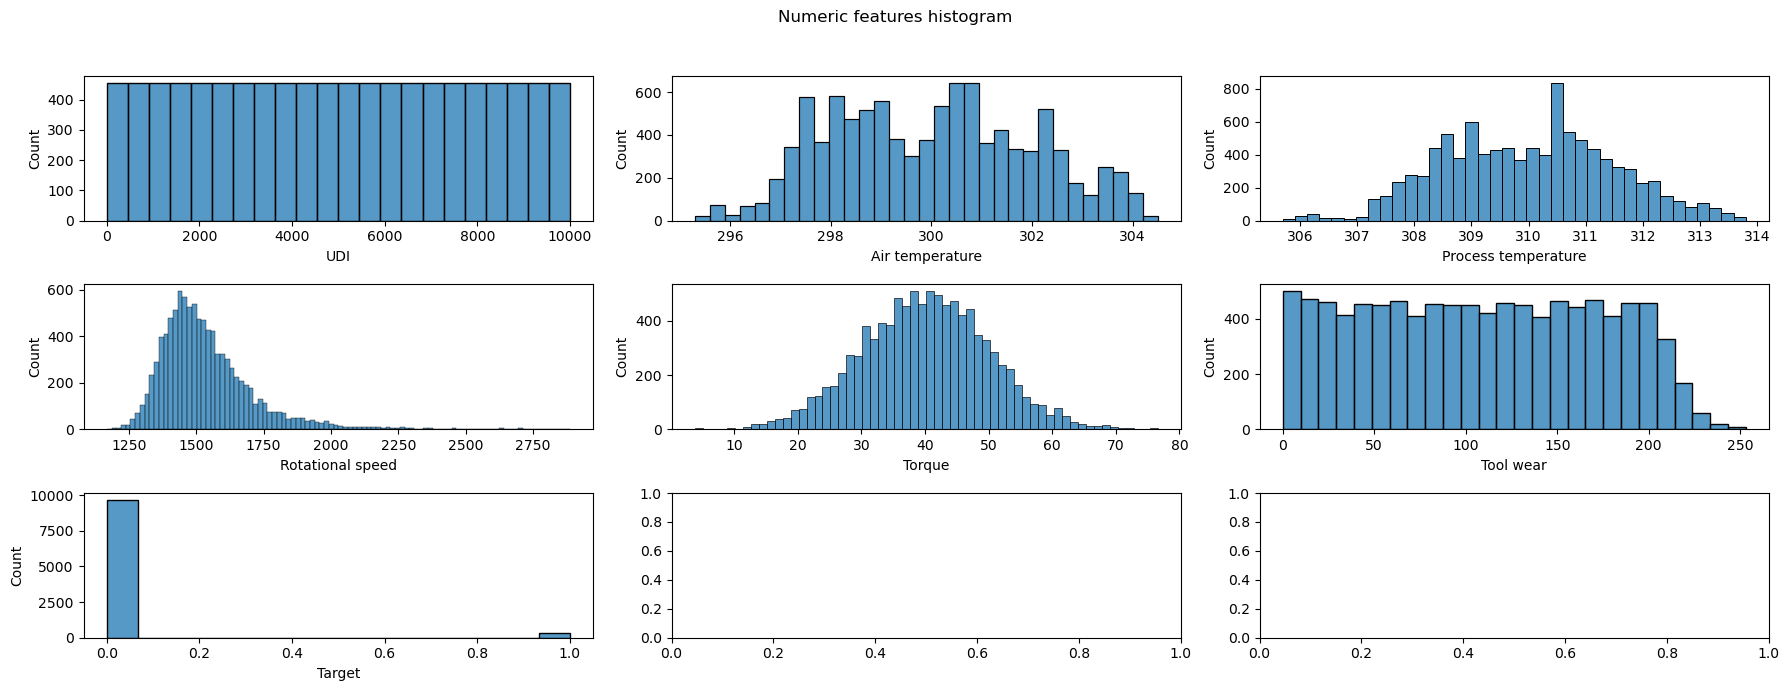

In [14]:
#Creating Histogram for all numeric  features
fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(18,7))
fig.suptitle('Numeric features histogram')
for j,feature in enumerate(numeric_columns):
    sns.histplot(ax=axs[j//3,j-3*(j//3)],data=df,x=feature)
    axs[j // 3, j % 3].set_xlabel(feature)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

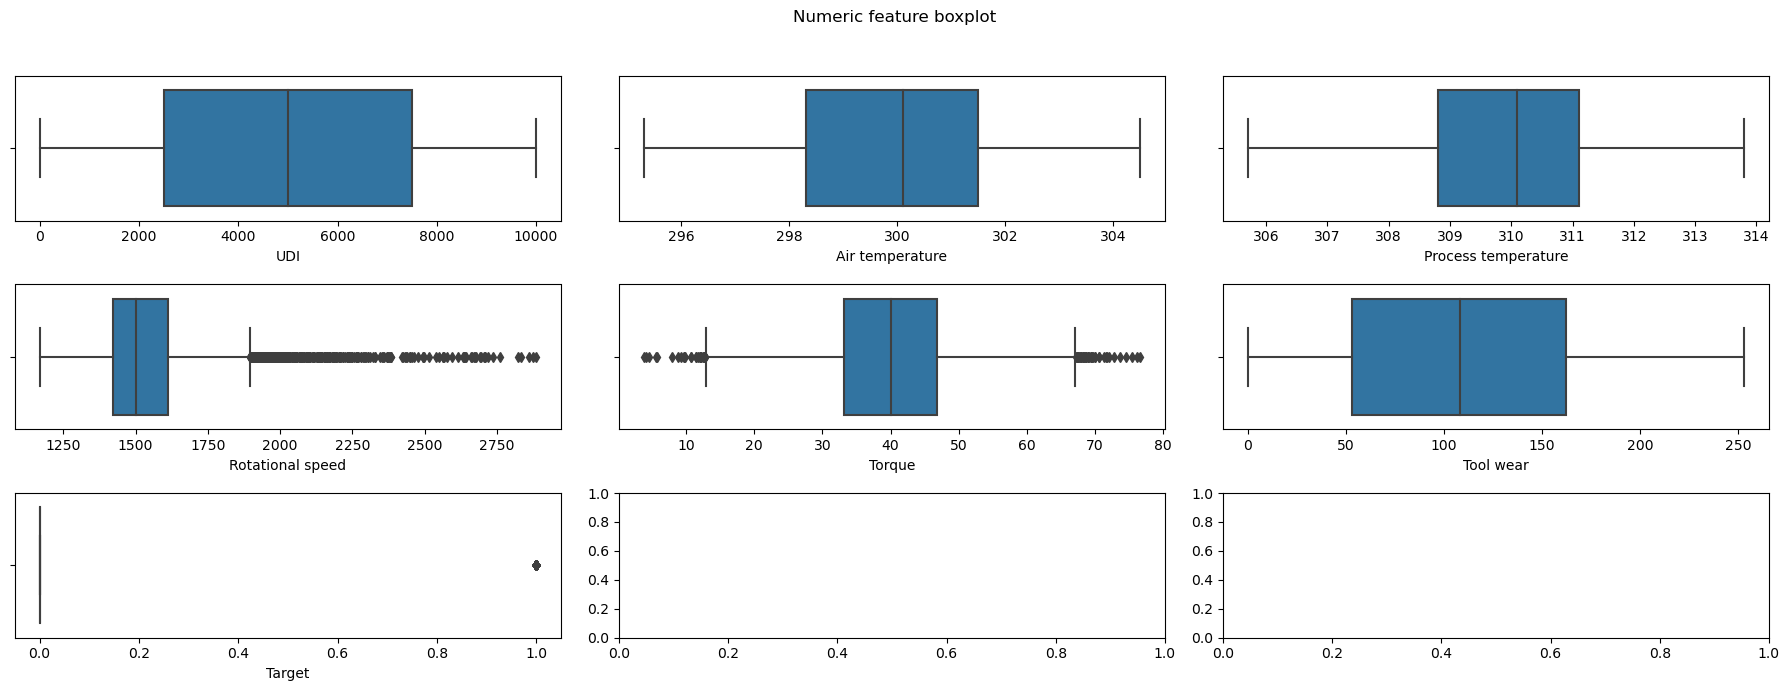

In [15]:
# Checking Outliers
fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(18,7))
fig.suptitle('Numeric feature boxplot')
for j,feature in enumerate(numeric_columns):
    sns.boxplot(ax=axs[j//3,j-3*(j//3)],data=df,x=feature)
    axs[j // 3, j % 3].set_xlabel(feature)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Ordinal  Encoding and Feature Selection

As we have column Target in our dataset which has 2 values 0 or 1, which indicates failure and no failure.
So , we take those rows in which Target value is 1, in order to predict type of failure occur.

In [16]:
df[df['Target']==1]

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,Power Failure
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure


In [17]:
# Selecting Independent and Dependent Features
X = df.iloc[:,2:8]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
y_train.shape

(8000,)

In [18]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['L', 'M', 'H']])
oe.fit(X_train[['Type']])
X_train['Type'] = oe.transform(X_train[['Type']]).astype(int)
X_test['Type'] = oe.transform(X_test[['Type']]).astype(int)

In [19]:
X_train.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
9254,0,298.3,309.1,1616,31.1,195
1561,0,298.2,308.4,1388,53.8,137
1670,0,298.2,307.8,1528,31.1,194
6087,1,300.9,310.8,1599,33.0,7
6669,0,301.4,310.5,1571,33.9,208


In [20]:
from sklearn.preprocessing import LabelEncoder
categories = ['No Failure', 'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure', 'Tool Wear Failure', 'Random Failures']
custom_encoder = {cat: i for i, cat in enumerate(categories)}
y_train_encoded = [custom_encoder.get(cat, len(categories)) for cat in y_train]
y_test_encoded = [custom_encoder.get(cat, len(categories)) for cat in y_test]
le = LabelEncoder()
le.fit(list(custom_encoder.values()))
y_train = le.transform(y_train_encoded)
y_test = le.transform(y_test_encoded)

# Model Building

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

clf = LogisticRegression(solver='lbfgs', max_iter=10000)
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

log_train = round(clf.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")

print("Classification_Report: \n",classification_report(y_test,y_pred))


Training Accuracy    : 98.21 %
Model Accuracy Score : 97.8 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1935
           1       0.57      0.27      0.36        15
           2       0.84      0.80      0.82        20
           3       0.80      0.62      0.70        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2000
   macro avg       0.53      0.45      0.48      2000
weighted avg       0.97      0.98      0.97      2000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


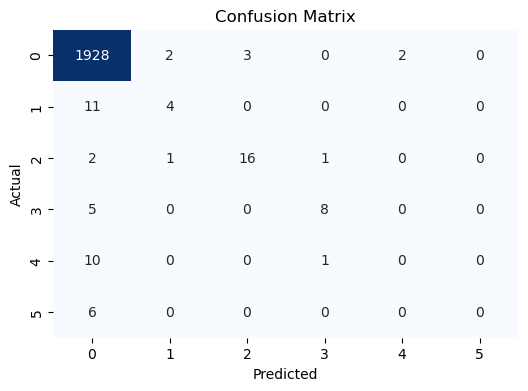

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")

print("Classification_Report: \n",classification_report(y_test,y_pred_dec))


Training Accuracy    : 100.0 %
Model Accuracy Score : 97.3 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1935
           1       0.87      0.87      0.87        15
           2       0.71      0.85      0.77        20
           3       0.50      0.62      0.55        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.51      0.55      0.53      2000
weighted avg       0.97      0.97      0.97      2000



# Random Forest

In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")

print("Classification_Report: \n",classification_report(y_test,y_pred_rf))


Training Accuracy    : 100.0 %
Model Accuracy Score : 98.15 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1935
           1       0.91      0.67      0.77        15
           2       0.83      0.75      0.79        20
           3       0.88      0.54      0.67        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2000
   macro avg       0.60      0.49      0.54      2000
weighted avg       0.97      0.98      0.98      2000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machines

In [25]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")

print("Classification_Report: \n",classification_report(y_test,y_pred_svc))


Training Accuracy    : 96.58 %
Model Accuracy Score : 96.85 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1935
           1       0.00      0.00      0.00        15
           2       0.75      0.15      0.25        20
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.29      0.19      0.21      2000
weighted avg       0.94      0.97      0.95      2000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Anshika Tyagi\AppData\Local\Temp\ipykernel_16536\1548324062.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),mask=np.triu(df.corr()),annot=True,cmap='BrBG')


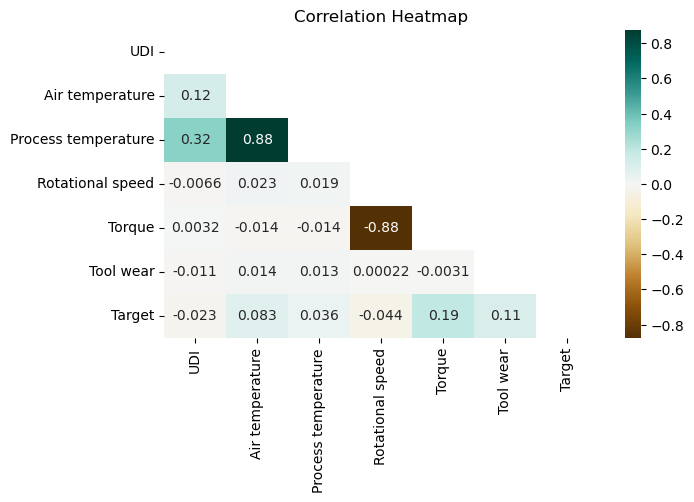

In [26]:
#Correlation Heatmap
plt.figure(figsize=(7,4))
sns.heatmap(data=df.corr(),mask=np.triu(df.corr()),annot=True,cmap='BrBG')
plt.title('Correlation Heatmap')
plt.show()

# THANK YOU!

Done By - Anshika Tyagi